In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import pandas as pd
import gensim.downloader as api

In [2]:
words = pd.read_csv("transformed_data.csv")
words["Nature"] = words["Nature"].replace({"Negative": 0, "Positive": 1})
words

/tmp/ipykernel_25582/3073313590.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  words["Nature"] = words["Nature"].replace({"Negative": 0, "Positive": 1})


,Word,Nature
0,smuttier,0
1,steadiness,1
2,home,1
3,accuses,0
4,remorselessness,0
...,...,...
9411,immaculate,1
9412,malcontent,0
9413,cultured,1
9414,vibration,0


In [3]:
model = api.load("word2vec-google-news-300")

In [4]:
def apply_embeddings(word):
    if word in model.key_to_index:
        return model[word][:100]
    else:
        return None

In [5]:
words["Embeddings"] = words["Word"].apply(apply_embeddings)

In [6]:
words.dropna(inplace=True)

In [7]:
words_int = pd.DataFrame(words["Embeddings"].tolist(), index=words.index)
words_int.columns = [f'{i}' for i in range(words_int.shape[1])]
words = words.drop(columns=["Embeddings"]).join(words_int)
words

,Word,Nature,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
1,steadiness,1,0.133789,0.292969,-0.225586,0.128906,0.127930,-0.087402,0.130859,-0.476562,...,0.114258,0.042725,0.035645,-0.048096,0.279297,-0.116699,-0.267578,0.186523,-0.186523,-0.474609
2,home,1,-0.011841,0.079590,0.016846,-0.089844,0.086426,0.024170,0.025513,-0.189453,...,-0.147461,0.067383,-0.056152,-0.486328,-0.007690,-0.026855,0.083984,-0.028687,-0.070801,-0.082031
3,accuses,0,0.296875,0.070801,0.492188,-0.566406,0.040283,0.087891,0.039551,-0.069824,...,0.152344,-0.273438,0.084473,-0.000679,0.033691,-0.240234,0.243164,0.010864,0.221680,0.053711
4,remorselessness,0,0.086426,0.010620,0.017578,-0.033447,-0.035645,0.076172,0.213867,0.044434,...,0.061035,-0.020996,-0.019409,0.127930,0.124512,0.012390,0.039795,0.032715,0.057617,-0.022583
6,disparage,0,0.021118,0.172852,0.052002,0.011169,-0.113281,0.353516,0.167969,0.062012,...,0.152344,-0.316406,0.033691,-0.029785,0.279297,-0.072754,-0.031128,0.261719,0.086914,-0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9411,immaculate,1,0.056885,0.179688,0.059326,-0.103516,0.232422,-0.060791,0.034912,-0.114746,...,-0.073730,-0.140625,-0.004395,0.186523,-0.077148,-0.255859,-0.220703,-0.051025,-0.217773,-0.265625
9412,malcontent,0,0.271484,0.053955,0.125000,0.378906,-0.289062,0.306641,-0.136719,-0.092773,...,0.140625,0.147461,-0.146484,-0.200195,0.054443,0.129883,0.120605,0.223633,-0.115234,-0.462891
9413,cultured,1,-0.097656,0.253906,0.176758,0.074707,-0.017578,0.226562,-0.019775,-0.304688,...,-0.181641,0.005798,-0.230469,0.154297,0.146484,-0.106445,-0.091309,-0.016724,-0.091797,-0.176758
9414,vibration,0,-0.205078,-0.079590,-0.114258,-0.263672,-0.239258,-0.005188,-0.125000,0.036377,...,-0.005157,0.113281,-0.289062,0.566406,-0.243164,-0.012512,0.063965,-0.330078,0.279297,-0.104004


In [8]:
train_words = words[:7000]
test_words = words[7000:]

In [9]:
train_input = train_words.drop(columns=["Word", "Nature"]).values
test_input = test_words.drop(columns=["Word", "Nature"]).values

In [10]:
output = words["Nature"]
train_output = output[:7000]
test_output = output[7000:]

In [11]:
def one_hot(l):
    arr = l
    encoded_arr = np.zeros((arr.size, arr.max()+1), dtype=int)
    encoded_arr[np.arange(arr.size),arr] = 1
    return encoded_arr

In [12]:
def softmax(l):
    npl = np.array(l)
    sm = np.exp(npl - np.max(npl, axis=0, keepdims=True))
    probs = sm / np.sum(sm, axis=0, keepdims=True)
    return probs

In [13]:
one_hot_train_output = one_hot(train_output)

In [14]:
def dRelu(x):
    return np.where(x > 0, 1, 0)

Epoch 0 completed
Epoch 1000 completed
Epoch 2000 completed
Epoch 3000 completed
Epoch 4000 completed
Epoch 5000 completed
Epoch 6000 completed
Epoch 7000 completed
Epoch 8000 completed
Epoch 9000 completed


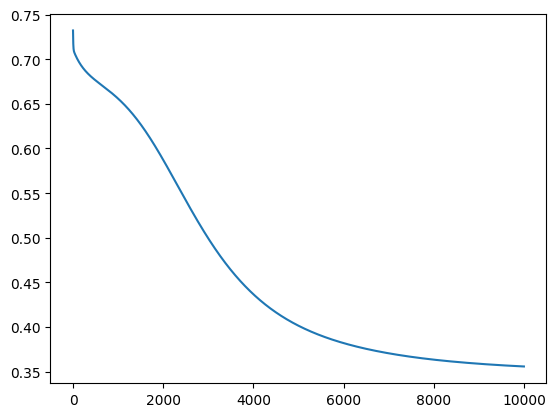

In [39]:
hweights1 = np.random.rand(100)
hweights2 = np.random.rand(100)
hweights3 = np.random.rand(100)

hbias1 = 1
hbias2 = 2
hbias3 = 3

weights1 = np.random.rand(3)
weights2 = np.random.rand(3)

bias1 = 1
bias2 = 2

best_weights_1 = list(weights1)
best_weights_2 = list(weights2)
best_bias_1 = bias1
best_bias_2 = bias2
predicted = []
lowest_loss = 9999999
learning_rate = 0.01

all_losses = []
lowest_losses = []
relu_derivs = []

# multiplied by 0.05 to make the weights small
for i in range(10000):
    predicted = []
    l1_cache = []
    
    for j in train_input:
        l1 = [
            np.max([0, np.dot(j, hweights1) + hbias1]),
            np.max([0, np.dot(j, hweights2) + hbias2]),
            np.max([0, np.dot(j, hweights3) + hbias3])
        ]
        l1_cache.append(l1)
        l2 = [
            np.dot(l1, weights1) + bias1,
            np.dot(l1, weights2) + bias2
        ]
        
        predicted.append(softmax(l2))

    predicted = np.array(predicted)
    l1_cache = np.array(l1_cache)
    
    correct_confidences = np.sum(predicted * one_hot_train_output, axis=1)
    loss = np.mean(-np.log(correct_confidences))

    dL_dz2 = predicted - one_hot_train_output

    dL_dw2_1 = np.dot(l1_cache.T, dL_dz2[:, 0]) / train_input.shape[0]
    dL_dw2_2 = np.dot(l1_cache.T, dL_dz2[:, 1]) / train_input.shape[0]
    dL_db2 = np.mean(dL_dz2, axis=0)
    
    dl1 = np.dot(dL_dz2, np.array([weights1, weights2])) * dRelu(l1_cache)
    
    dL_dw1_1 = np.dot(train_input.T, dl1[:, 0]) / train_input.shape[0]
    dL_dw1_2 = np.dot(train_input.T, dl1[:, 1]) / train_input.shape[0]
    dL_dw1_3 = np.dot(train_input.T, dl1[:, 2]) / train_input.shape[0]
    
    dL_db1 = np.mean(dl1, axis=0)
    
    weights1 -= learning_rate * dL_dw2_1
    weights2 -= learning_rate * dL_dw2_2
    bias1 -= learning_rate * dL_db2[0]
    bias2 -= learning_rate * dL_db2[1]
    
    hweights1 -= learning_rate * dL_dw1_1
    hweights2 -= learning_rate * dL_dw1_2
    hweights3 -= learning_rate * dL_dw1_3
    hbias1 -= learning_rate * dL_db1[0]
    hbias2 -= learning_rate * dL_db1[1]
    hbias3 -= learning_rate * dL_db1[2]

    all_losses.append(loss)

    if i % 1000 == 0:
        print(f"Epoch {i} completed")

plt.plot(range(len(all_losses)), all_losses)

In [40]:
def predicted_output(test):
    predictedt = []
    l1_c = []
    for j in test:
        l1 = [
            np.max([0, np.dot(j, hweights1) + hbias1]),
            np.max([0, np.dot(j, hweights2) + hbias2]),
            np.max([0, np.dot(j, hweights3) + hbias3])
        ]
        l1_c.append(l1)
        l2 = [
            np.dot(l1, weights1) + bias1,
            np.dot(l1, weights2) + bias2
        ]
        
        sftmx = softmax(l2)
        if sftmx[0] > sftmx[1]: predictedt.append([1,0])
        else: predictedt.append([0,1])
            
    predictedt = np.array(predictedt)
    return predictedt

predicted_res = predicted_output(test_input)

one_hot_test_output = one_hot(test_output)
one_hot_test_output = one_hot_test_output.tolist()

correct_samples = 0
tp, fp, tn, fn = 0, 0, 0, 0

for i in range(len(test_output)):
    if np.array_equal(predicted_res[i], one_hot_test_output[i]):
        correct_samples += 1
        if np.array_equal(predicted_res[i], [1,0]):
            tn += 1
        else:
            tp += 1
    elif np.array_equal(predicted_res[i], [1,0]) and np.array_equal(one_hot_test_output[i], [0,1]):
        fp += 1
    elif np.array_equal(predicted_res[i], [0,1]) and np.array_equal(one_hot_test_output[i], [1,0]):
        fn += 1
    else: 
        pass

accuracy = correct_samples / len(test_output)
precision = tp / (tp+fp)
recall = tp / (tp + fn)

print("Confusion matrix: ")
print('{0:2d} {1:2d}\n{2:2d} {3:2d}'.format(tp, fp, fn, tn))
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", 2 * precision * recall / (precision + recall))
print("Accuracy: ", accuracy * 100)

Confusion matrix: 
473 117
88 639
Precision:  0.8016949152542373
Recall:  0.8431372549019608
F1 Score:  0.8218940052128584
Accuracy:  84.43432042520881


In [41]:
def predict(word):
    emb = []
    if word in model.key_to_index:
        emb = model[word][:100]
    else:
        return None

    pred = predicted_output([emb])
    if np.array_equal(pred[0], [1,0]): print(f"{word} is a negative word")
    else: print(f"{word} is a positive word")

In [44]:
predict("happy")

happy is a positive word


In [63]:
predict("dangerous")

dangerous is a negative word


In [1]:
import pickle 
model_data = {
    "hweights1": hweights1,
    "hweights2": hweights2,
    "hweights3": hweights3,
    "hbias1":hbias1,
    "hbias2":hbias2,
    "hbias3":hbias3,
    "weights1": weights1,
    "weights2": weights2,
    "bias1": bias1,
    "bias2": bias2
}

with open("model.pkl", "wb") as f:
    pickle.dump(model_data, f)

NameError: name 'hweights1' is not defined